<a href="https://colab.research.google.com/github/Sameer-Tahir/Project_DS/blob/main/DL_Models/DL_1D_CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!git clone https://github.com/Sameer-Tahir/Project_DS.git

Cloning into 'Project_DS'...
remote: Enumerating objects: 274, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 274 (delta 63), reused 6 (delta 6), pack-reused 113 (from 1)
Receiving objects: 100% (274/274), 16.21 MiB | 9.39 MiB/s, done.
Resolving deltas: 100% (87/87), done.


In [15]:
# Import libraries
import pandas as pd   # data processing
import numpy as np    # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import json
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


In [16]:
# -----------------------
# Load your splits
# -----------------------
train_df = pd.read_csv("dfk1_train.csv")
val_df   = pd.read_csv("dfk1_val.csv")
test_df  = pd.read_csv("dfk1_test.csv")

In [17]:
!unzip -o dl_preprocessed.zip

Archive:  dl_preprocessed.zip
  inflating: dl_data_windows.npz     
  inflating: label_encoder.pkl       
  inflating: scaler.pkl              


In [18]:
import numpy as np, joblib

# -----------------------
# Load preprocessed arrays
# -----------------------
data = np.load("dl_data_windows.npz", allow_pickle=True)
X_train, y_train = data["X_train"], data["y_train"]
X_val, y_val     = data["X_val"],   data["y_val"]
X_test, y_test   = data["X_test"],  data["y_test"]
feature_cols     = data["feature_cols"].tolist()
classes          = data["classes"]

# Load encoder & scaler
le = joblib.load("label_encoder.pkl")
scaler = joblib.load("scaler.pkl")

print("✅ Data loaded successfully")
print("Train:", X_train.shape, y_train.shape)
print("Val:",   X_val.shape, y_val.shape)
print("Test:",  X_test.shape, y_test.shape)
print("Classes:", classes)

✅ Data loaded successfully
Train: (4835, 6, 222) (4835,)
Val: (591, 6, 222) (591,)
Test: (590, 6, 222) (590,)
Classes: ['aggressive-scan' 'cryptojacking' 'icmp-flood' 'icmp-fragmentation'
 'icmp-fragmentation_old' 'none' 'os-fingerprinting' 'os-scan' 'port-scan'
 'push-ack-flood' 'serice-detection' 'service-detection' 'syn-flood'
 'syn-stealth' 'synonymous-ip-flood' 'tcp-flood' 'udp-flood' 'vuln-scan']


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 6, 128)         │        85,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 6, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 3, 128)         │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 3, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 1, 64)          │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 18)             │         1,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,066 (695.57 KB)

 Trainable params: 177,554 (693.57 KB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/50
146/152 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5934 - loss: 1.3123
Epoch 1: val_accuracy improved from -inf to 0.73266, saving model to CNN_best.keras
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5973 - loss: 1.2970 - val_accuracy: 0.7327 - val_loss: 1.1802 - learning_rate: 0.0010
Epoch 2/50
151/152 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7661 - loss: 0.6741
Epoch 2: val_accuracy improved from 0.73266 to 0.73435, saving model to CNN_best.keras
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7660 - loss: 0.6740 - val_accuracy: 0.7343 - val_loss: 0.8001 - learning_rate: 0.0010
Epoch 3/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7881 - loss: 0.5800
Epoch 3: val_accuracy improved from 0.73435 to 0.81218, saving model to CNN_best.keras
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7881 - loss: 0.5800 - val_accuracy: 0.8122 - val_loss: 0.5484 - learning_rate: 0.0010
Epoch 4/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc

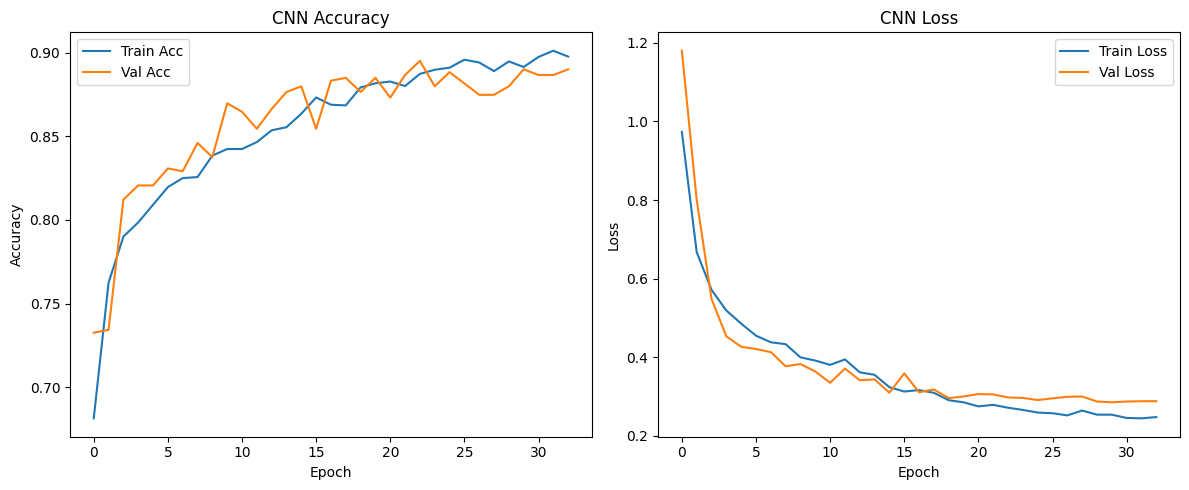

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

✅ CNN Results
Accuracy: 0.8950930626057529
Macro-F1: 0.7405326072580473
                        precision    recall  f1-score   support

       aggressive-scan       0.73      0.58      0.65        19
         cryptojacking       1.00      1.00      1.00       165
            icmp-flood       0.81      1.00      0.90        13
    icmp-fragmentation       1.00      1.00      1.00        11
icmp-fragmentation_old       1.00      0.50      0.67         6
                  none       1.00      1.00      1.00       220
     os-fingerprinting       0.33      0.25      0.29        12
               os-scan       0.45      0.83      0.59         6
             port-scan       0.56      0.45      0.50        20
        push-ack-flood       1.00      1.00      1.00        13
      serice-detection       0.75      0.50      0.60         6
     service-detection       0.44      0.86      0.59        14
             syn-flood       1.00      1.00      1.00 

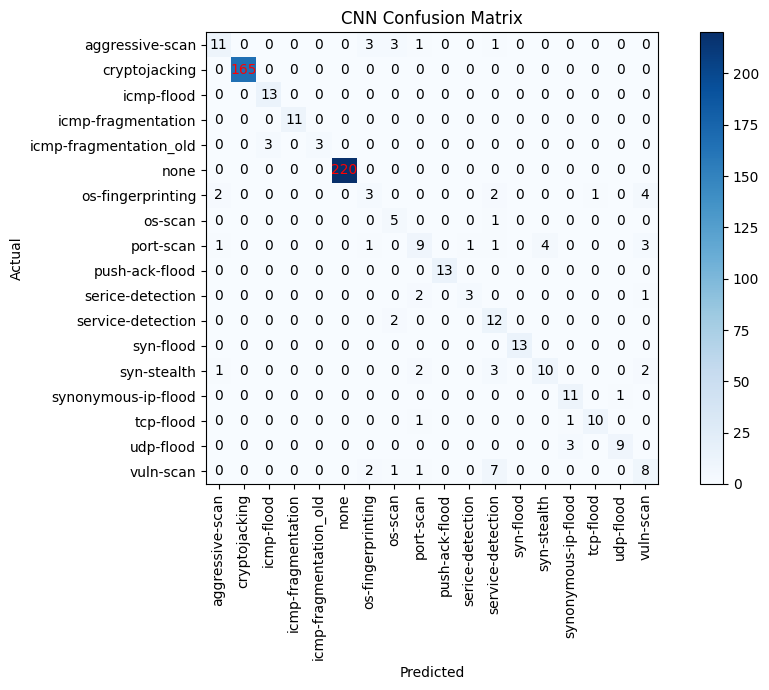

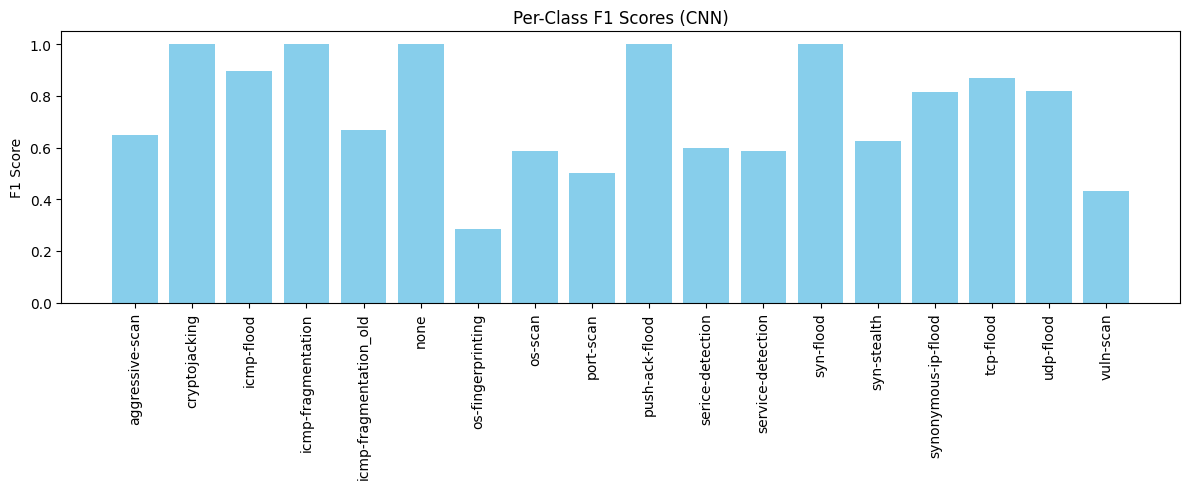

📂 Saved: CNN_final.keras, CNN_training_curves.png, CNN_confusion_matrix.png, CNN_f1_per_class.png, results_cnn.json


In [19]:
# -----------------------
# Build Improved 1D CNN
# -----------------------
def build_cnn(window, n_features, n_classes):
    model = models.Sequential([
        layers.Input(shape=(window, n_features)),

        # Conv Block 1
        layers.Conv1D(128, kernel_size=3, activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),

        # Conv Block 2
        layers.Conv1D(128, kernel_size=3, activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),

        # Conv Block 3 (deeper for feature extraction)
        layers.Conv1D(64, kernel_size=3, activation="relu", padding="same"),
        layers.GlobalAveragePooling1D(),

        # Dense Layers
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.4),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(n_classes, activation="softmax")
    ])

    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

cnn_model = build_cnn(window=X_train.shape[1], n_features=X_train.shape[2], n_classes=len(classes))
cnn_model.summary()

# -----------------------
# Callbacks
# -----------------------
early_stop = callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)

lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=3, verbose=1
)

checkpoint = callbacks.ModelCheckpoint(
    "CNN_best.keras", monitor="val_accuracy", save_best_only=True, mode="max", verbose=1
)

# -----------------------
# Train CNN
# -----------------------
history_cnn = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,   # smaller batch for finer updates
    callbacks=[early_stop, lr_scheduler, checkpoint],
    verbose=1
)

# -----------------------
# Plot Accuracy & Loss
# -----------------------
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history["accuracy"], label="Train Acc")
plt.plot(history_cnn.history["val_accuracy"], label="Val Acc")
plt.title("CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history["loss"], label="Train Loss")
plt.plot(history_cnn.history["val_loss"], label="Val Loss")
plt.title("CNN Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.savefig("CNN_training_curves.png")
plt.show()

# -----------------------
# Evaluate CNN
# -----------------------
y_val_pred = cnn_model.predict(X_val).argmax(axis=1)
val_acc = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average="macro")
report = classification_report(y_val, y_val_pred, target_names=classes, zero_division=0)

print("\n✅ CNN Results")
print("Accuracy:", val_acc)
print("Macro-F1:", val_f1)
print(report)

# -----------------------
# Confusion Matrix
# -----------------------
cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(10, 7))
plt.imshow(cm, cmap="Blues")
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.xticks(np.arange(len(classes)), classes, rotation=90)
plt.yticks(np.arange(len(classes)), classes)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center",
                 color="red" if cm[i, j] > cm.max()/2 else "black")

plt.tight_layout()
plt.savefig("CNN_confusion_matrix.png")
plt.show()

# -----------------------
# Per-class F1 bar plot
# -----------------------
from sklearn.metrics import precision_recall_fscore_support

prec, rec, f1, support = precision_recall_fscore_support(y_val, y_val_pred, zero_division=0)

plt.figure(figsize=(12, 5))
plt.bar(classes, f1, color="skyblue")
plt.xticks(rotation=90)
plt.title("Per-Class F1 Scores (CNN)")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.savefig("CNN_f1_per_class.png")
plt.show()

# -----------------------
# Save Model + Results
# -----------------------
cnn_model.save("CNN_final.keras")

results = {
    "cnn": {
        "accuracy": float(val_acc),
        "macro_f1": float(val_f1),
        "report": report,
        "confusion_matrix": cm.tolist(),
        "per_class_f1": dict(zip(classes, f1.tolist()))
    }
}

with open("results_cnn.json", "w") as f:
    json.dump(results, f, indent=4)

print("📂 Saved: CNN_final.keras, CNN_training_curves.png, CNN_confusion_matrix.png, CNN_f1_per_class.png, results_cnn.json")


In [ ]:
# # Setup Git (first time only per machine)
# !git config --global user.email "your_email@example.com"
# !git config --global user.name "your_name"

# # Save current notebook (from Colab)
# !jupyter nbconvert --to notebook --execute my_notebook.ipynb --output trained_notebook.ipynb

# # Push to GitHub
# !git init
# !git remote add origin https://github.com/USERNAME/REPO.git
# !git add .
# !git commit -m "Save DL model results"
# !git branch -M main
# !git push -u origin main